## Julia Interfacing with R and Python

In [1]:
using PyCall
using RCall
using DecisionTree
using DataFrames
using ScikitLearn

### R"" vs py"" String Macro

- R"" executes R commands inside the string and returns an R object 
- py"" executes Python commands with implicit conversion of python objects into Julia data type.

In [9]:
py"1+1" # returns julia numeric value by implicit conversion

2

In [14]:
R"result=1+1" # returns an RObject

RObject{RealSxp}
[1] 2


In [15]:
@rget result # use @rget macro to copy value from R to Julia

2.0

In [36]:
R"1+1" |> rcopy # or use rcopy to directoy convert R object into Julia data type 

2.0

### Defining a function in Python

In [23]:
py"""

import numpy as np

def mysin(x):
   return np.sin(x)
"""

In [24]:
py"mysin(10)" # calling python function

-0.5440211108893699

In [38]:
py"np.sin(10)"  # calling directly numpy sin function

-0.5440211108893699

### Defining a function in R

In [39]:
R"""

mysin <- function(x) {
   sin(x)
}
"""

RObject{ClosSxp}
function (x) 
{
    sin(x)
}


In [31]:
R"mysin(10)" |> rcopy   # R"" returns an object which rcopy converts to Julia data

-0.5440211108893699

In [42]:
iris = R"iris" |> rcopy # copy iris dataset from R to Julia
iris |> (x->first(x,5))

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Species
,Float64,Float64,Float64,Float64,Categorical…
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa


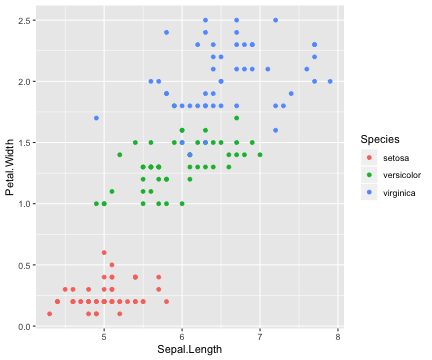

RObject{VecSxp}


In [10]:
R"""
library(ggplot2)

ggplot(iris,aes(x=Sepal.Length,y=Petal.Width))+geom_point(aes(color=Species))
"""

In [11]:
# won't run in binder

py"""
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
from sklearn.decomposition import PCA

# import some data to play with
iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features.
y = iris.target

x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5

plt.figure(2, figsize=(8, 6))
plt.clf()

# Plot the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1,
            edgecolor='k')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())

# To getter a better understanding of interaction of the dimensions
# plot the first three PCA dimensions
fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)
X_reduced = PCA(n_components=3).fit_transform(iris.data)
ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], c=y,
           cmap=plt.cm.Set1, edgecolor='k', s=40)
ax.set_title("First three PCA directions")
ax.set_xlabel("1st eigenvector")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector")
ax.w_zaxis.set_ticklabels([])

plt.show()
"""

### Let's visualize the data

In [43]:
using DataVoyager
using VegaDatasets

In [18]:
# won't run in binder

cars = VegaDatasets.dataset("cars")
cars |> Voyager()

Voyager(Electron.Window(Application(Base.PipeEndpoint(RawFD(0x00000042) paused, 0 bytes waiting), Process(`/Users/ppalmes/.julia/packages/Electron/wL84D/src/../deps/electron/Julia.app/Contents/MacOS/Julia /Users/ppalmes/.julia/packages/Electron/wL84D/src/main.js /var/folders/4q/wmjkdk493sn6nt63_t4v_jrr0000gn/T/juliaelectron-64142-1 /var/folders/4q/wmjkdk493sn6nt63_t4v_jrr0000gn/T/juliaelectron-sysnotify-64142-1 IXadn81TSTvWJjK7CTp0A2z498WaL9dHOEMMJeJvpr6ajMabCVdC2f091roLIkEZ2MPxdubDTMxP/iqGJq/uLcBWnIrUa7QnwvIiTFkkl9k6Lzua3t0odEAZrE4yCcsod85XRxmmgnjh/CiXTfZDJtERA/HRMxpp68TFlUAgrww=`, ProcessRunning), [1 window]), 1, true, Channel{Any}(sz_max:128,sz_curr:0)))

In [ ]:
using VegaDatasets
cars=dataset("cars")
cars |> Voyager()

###   Scikitlearn classifiers using Julia bindings of Python (PyCall.jl)

In [20]:
using PyCall
LNM = pyimport("sklearn.linear_model");
learner=LNM.LogisticRegression()

x=iris[:,1:4] |> Matrix;
y=iris[:,5] |> Array;

model=learner.fit(x, y)

accuracy = sum(model.predict(x) .== y) / length(y)
println("accuracy: $accuracy")

accuracy: 0.96


In [21]:
learner

PyObject LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [22]:
KNN = pyimport("sklearn.neighbors")

using ScikitLearn.CrossValidation: cross_val_score

modelKNN = KNN.KNeighborsClassifier(3)
cross_val_score(modelKNN, x, y; cv=10)  # 5-fold

10-element Array{Float64,1}:
 1.0               
 0.9333333333333333
 1.0               
 0.9333333333333333
 0.8666666666666667
 1.0               
 0.9333333333333333
 1.0               
 1.0               
 1.0               

In [23]:
using ScikitLearn.GridSearch: GridSearchCV
GS=pyimport("sklearn.model_selection");
lbgfs=LNM.LogisticRegression(multi_class="auto",solver="lbfgs")

PyObject LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [24]:
gridsearch = GS.GridSearchCV(lbgfs, Dict(:C => 0.1:0.1:2.0))
res=gridsearch.fit(x, y)
println("Best parameters: $(res.best_params_)")

Best parameters: Dict{Any,Any}("C" => 0.6)


┌ Info: Recompiling stale cache file /Users/ppalmes/.julia/compiled/v1.2/Plots/ld3vC.ji for Plots [91a5bcdd-55d7-5caf-9e0b-520d859cae80]
└ @ Base loading.jl:1240


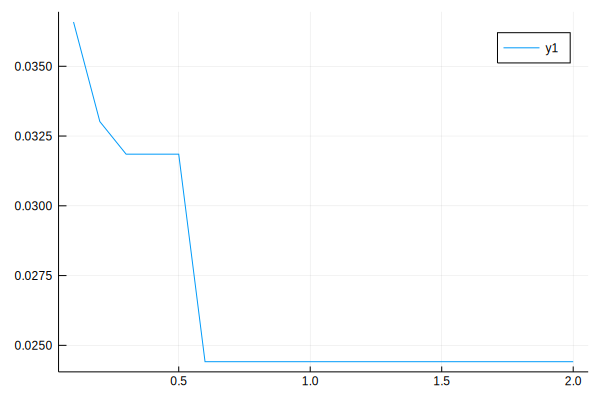

In [25]:
using Plots
gr()
Cparams=convert.(Float64,res.cv_results_["param_C"])
Plots.plot(Cparams,res.cv_results_["std_test_score"])

In [26]:
using PyCall
const ENS=pyimport("sklearn.ensemble")
const LM=pyimport("sklearn.linear_model")
const DA=pyimport("sklearn.discriminant_analysis")
const NN=pyimport("sklearn.neighbors")
const SVM=pyimport("sklearn.svm")
const TREE=pyimport("sklearn.tree")
const ANN=pyimport("sklearn.neural_network")
const GP=pyimport("sklearn.gaussian_process")
const KR=pyimport("sklearn.kernel_ridge")
const NB=pyimport("sklearn.naive_bayes")
const ISO=pyimport("sklearn.isotonic")

PyObject <module 'sklearn.isotonic' from '/Users/ppalmes/.julia/conda/3/lib/python3.7/site-packages/sklearn/isotonic.py'>

In [27]:
learners = Dict(
  "AdaBoostClassifier" => ENS.AdaBoostClassifier,
  "BaggingClassifier" => ENS.BaggingClassifier,
  "ExtraTreesClassifier" => ENS.ExtraTreesClassifier,
  "VotingClassifier" => ENS.VotingClassifier,
  "GradientBoostingClassifier" => ENS.GradientBoostingClassifier,
  "RandomForestClassifier" => ENS.RandomForestClassifier,
  "LDA" => DA.LinearDiscriminantAnalysis,
  "QDA" => DA.QuadraticDiscriminantAnalysis,
  "LogisticRegression" => LM.LogisticRegression,
  "PassiveAggressiveClassifier" => LM.PassiveAggressiveClassifier,
  "RidgeClassifier" => LM.RidgeClassifier,
  "RidgeClassifierCV" => LM.RidgeClassifierCV,
  "SGDClassifier" => LM.SGDClassifier,
  "KNeighborsClassifier" => NN.KNeighborsClassifier,
  "RadiusNeighborsClassifier" => NN.RadiusNeighborsClassifier,
  "NearestCentroid" => NN.NearestCentroid,
  "SVC" => SVM.SVC,
  "LinearSVC" => SVM.LinearSVC,
  "NuSVC" => SVM.NuSVC,
  "MLPClassifier" => ANN.MLPClassifier,
  "GaussianProcessClassifier" => GP.GaussianProcessClassifier,
  "DecisionTreeClassifier" => TREE.DecisionTreeClassifier,
  "GaussianNB" => NB.GaussianNB,
  "MultinomialNB" => NB.MultinomialNB,
  "ComplementNB" => NB.ComplementNB,
  "BernoulliNB" => NB.BernoulliNB
);

In [28]:
function sktrain(learner,x,y)
    model = learner()
    xx = x |> Matrix
    yy = y |> Array
    model.fit(xx,yy)
    return model
end

sktrain (generic function with 1 method)

In [29]:
function skpredict(themodel,x)
    xx = x |> Matrix
    return themodel.predict(xx) |> collect
end

skpredict (generic function with 1 method)

In [56]:
x=iris[:,1:4] |> Matrix;
y=iris[:,5] |> Array;

In [31]:
modelLR = sktrain(learners["LogisticRegression"],x,y)

PyObject LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [32]:
res = skpredict(modelLR,x)

150-element Array{Any,1}:
 "setosa"   
 "setosa"   
 "setosa"   
 "setosa"   
 "setosa"   
 "setosa"   
 "setosa"   
 "setosa"   
 "setosa"   
 "setosa"   
 "setosa"   
 "setosa"   
 "setosa"   
 ⋮          
 "virginica"
 "virginica"
 "virginica"
 "virginica"
 "virginica"
 "virginica"
 "virginica"
 "virginica"
 "virginica"
 "virginica"
 "virginica"
 "virginica"

In [33]:
sum(res .== y) / length(y)

0.96

### Let's use R's Caret to predict Iris species

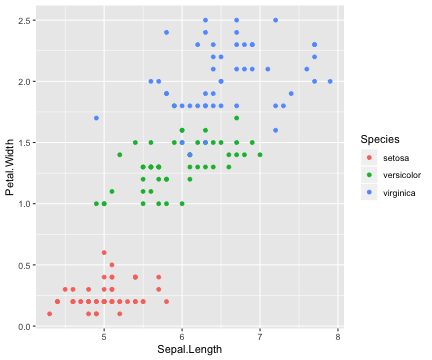

RObject{VecSxp}


In [44]:
using RCall
R"
library(ggplot2)
ggplot(iris,aes(Sepal.Length,Petal.Width,color=Species))+geom_point()
"

In [48]:
using RCall
R"""
library(caret)
library(e1071)
library(randomForest)
library(xgboost)
"""

RObject{StrSxp}
 [1] "xgboost"      "randomForest" "e1071"        "caret"        "lattice"     
 [6] "ggplot2"      "stats"        "graphics"     "grDevices"    "utils"       
[11] "datasets"     "methods"      "base"        


In [53]:
function crtrain(learner,x::DataFrame,y::Vector)
    xx = x |> DataFrame # DataFrame(x)
    yy = y |> Vector
    model = rcall(:train,xx,yy,method=learner)
    return model
end

crtrain (generic function with 1 method)

In [54]:
function crtpredict(model,x)
    xx = x |> DataFrame
    res = rcall(:predict,model,xx) #in robj
    return rcopy(res) |> collect  # return extracted robj
end

crtpredict (generic function with 1 method)

In [69]:
R"""

trainIndex <- createDataPartition(iris$Species, p = .8,list=F)
train = iris[trainIndex,]
test = iris[-trainIndex,]
"""
@rget train test;

In [72]:
xtrain=train[:,1:4] |> DataFrame;
ytrain=train[:,5] |> Array;
xtest = test[:,1:4] |> DataFrame;
ytest = test[:,:5] |> Array
crtmodel = crtrain("rf",xtrain,ytrain)

RObject{VecSxp}
Random Forest 

120 samples
  4 predictor
  3 classes: 'setosa', 'versicolor', 'virginica' 

No pre-processing
Resampling: Bootstrapped (25 reps) 
Summary of sample sizes: 120, 120, 120, 120, 120, 120, ... 
Resampling results across tuning parameters:

  mtry  Accuracy   Kappa    
  2     0.9179832  0.8756277
  3     0.9217727  0.8813783
  4     0.9199307  0.8785092

Accuracy was used to select the optimal model using the largest value.
The final value used for the model was mtry = 3.


In [79]:
ypred = crtpredict(crtmodel,xtest) 

30-element Array{String,1}:
 "setosa"    
 "setosa"    
 "setosa"    
 "setosa"    
 "setosa"    
 "setosa"    
 "setosa"    
 "setosa"    
 "setosa"    
 "setosa"    
 "versicolor"
 "versicolor"
 "versicolor"
 ⋮           
 "versicolor"
 "versicolor"
 "virginica" 
 "virginica" 
 "virginica" 
 "virginica" 
 "virginica" 
 "virginica" 
 "virginica" 
 "virginica" 
 "virginica" 
 "virginica" 

In [80]:
 sum(ypred .== ytest) / length(ytest)

1.0

In [82]:
crtmodel = crtrain("gbTree",xtrain,ytrain)
ypred = crtpredict(crtmodel,xtest) 
sum(ypred .== ytest) / length(ytest)

1.0